In [2]:
import numpy as np
import pandas as pd
import os
import keras 
from keras.models import Sequential 
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score
from ipywidgets import widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf


In [3]:
path = os.listdir('brain_tumor/Training/')
labels = ['no_tumor',  'pituitary_tumor', 'glioma_tumor', 'meningioma_tumor']

In [4]:
X_train = []
Y_train = []
for cls in labels:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j)
        img = cv2.resize(img, (80,80))
        X_train.append(img)
        Y_train.append(cls)
for cls in labels:
    pth = 'brain_tumor/Testing/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j)
        img = cv2.resize(img, (80,80))
        X_train.append(img)
        Y_train.append(cls)

In [5]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [6]:
X_train, Y_train = shuffle(X_train, Y_train, random_state = 101)
X_train.shape

(3264, 80, 80, 3)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
datagen = ImageDataGenerator(
    rotation_range=90,horizontal_flip=False,vertical_flip=True)
X_train_new = X_train
for i in range (2):
    datagen.fit(X_train_new)
    X_train = np.concatenate((X_train,X_train_new))

In [9]:
Y_train_new = Y_train
Y_train = np.concatenate((Y_train,Y_train_new))
Y_train = np.concatenate((Y_train,Y_train_new))

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 101)

In [11]:
Y_train_new = []
for i in Y_train:
    Y_train_new.append(labels.index(i))
    
Y_train = Y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)

Y_test_new = []
for i in Y_test:
    Y_test_new.append(labels.index(i))
    
Y_test = Y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)

In [12]:
model = Sequential()
model.add(Conv2D(64,(2,2),activation = 'relu',input_shape=(80,80,3)))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))
model.add(Conv2D(16,(2,2),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(16,(2,2),activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))
model.add(Conv2D(8,(2,2),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(8,(2,2),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024,activation = 'relu'))
#model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 79, 79, 64)        832       
                                                                 
 batch_normalization (BatchN  (None, 79, 79, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 78, 78, 64)        16448     
                                                                 
 batch_normalization_1 (Batc  (None, 78, 78, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 64)       0         
 )                                                               
                                                        

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [15]:
history = model.fit(X_train, Y_train, epochs = 30, validation_split = 0.1)

Epoch 1/30
248/248 [==============================] - 113s 451ms/step - loss: 0.8870 - accuracy: 0.6344 - val_loss: 0.6877 - val_accuracy: 0.7279
Epoch 2/30
248/248 [==============================] - 139s 562ms/step - loss: 0.5782 - accuracy: 0.7772 - val_loss: 0.4551 - val_accuracy: 0.8265
Epoch 3/30
248/248 [==============================] - 121s 487ms/step - loss: 0.4313 - accuracy: 0.8322 - val_loss: 0.2682 - val_accuracy: 0.9059
Epoch 4/30
248/248 [==============================] - 115s 462ms/step - loss: 0.3439 - accuracy: 0.8681 - val_loss: 0.2233 - val_accuracy: 0.9252
Epoch 5/30
248/248 [==============================] - 115s 463ms/step - loss: 0.2608 - accuracy: 0.8997 - val_loss: 0.2975 - val_accuracy: 0.8878
Epoch 6/30
248/248 [==============================] - 123s 496ms/step - loss: 0.2251 - accuracy: 0.9142 - val_loss: 0.1888 - val_accuracy: 0.9388
Epoch 7/30
248/248 [==============================] - 115s 462ms/step - loss: 0.1871 - accuracy: 0.9335 - val_loss: 0.0960 -

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
loss, accuracy = model.evaluate(X_train, Y_train)
print('Train loss:', loss)
print('Train accuracy:', accuracy)

276/276 [==============================] - 15s 56ms/step - loss: 0.0494 - accuracy: 0.9851
Train loss: 0.0493958555161953
Train accuracy: 0.9851338863372803


In [17]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

31/31 [==============================] - 2s 53ms/step - loss: 0.0606 - accuracy: 0.9837
Test loss: 0.060607265681028366
Test accuracy: 0.9836734533309937


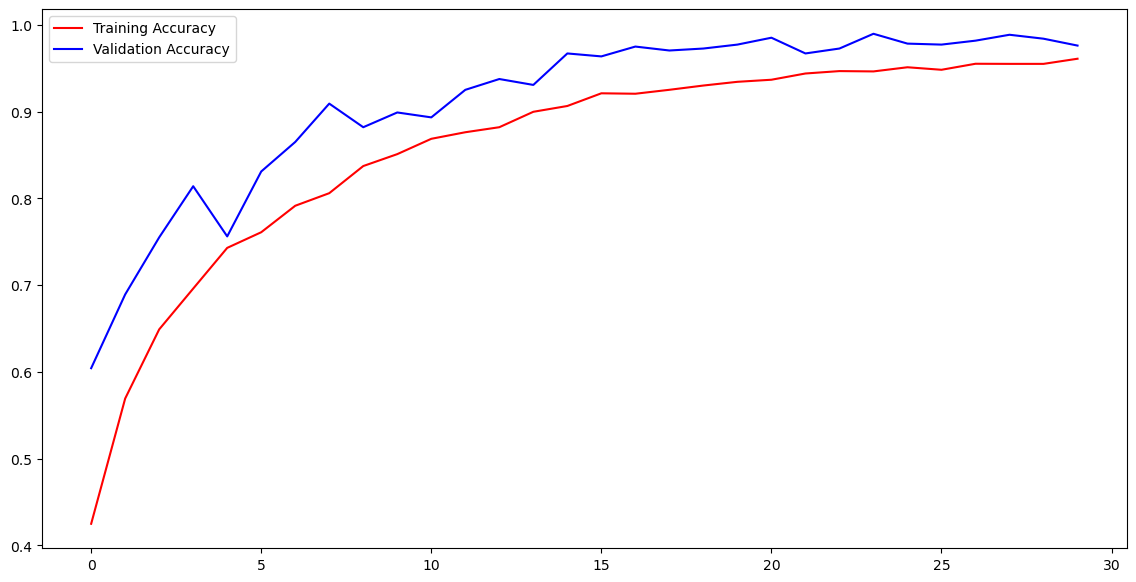

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

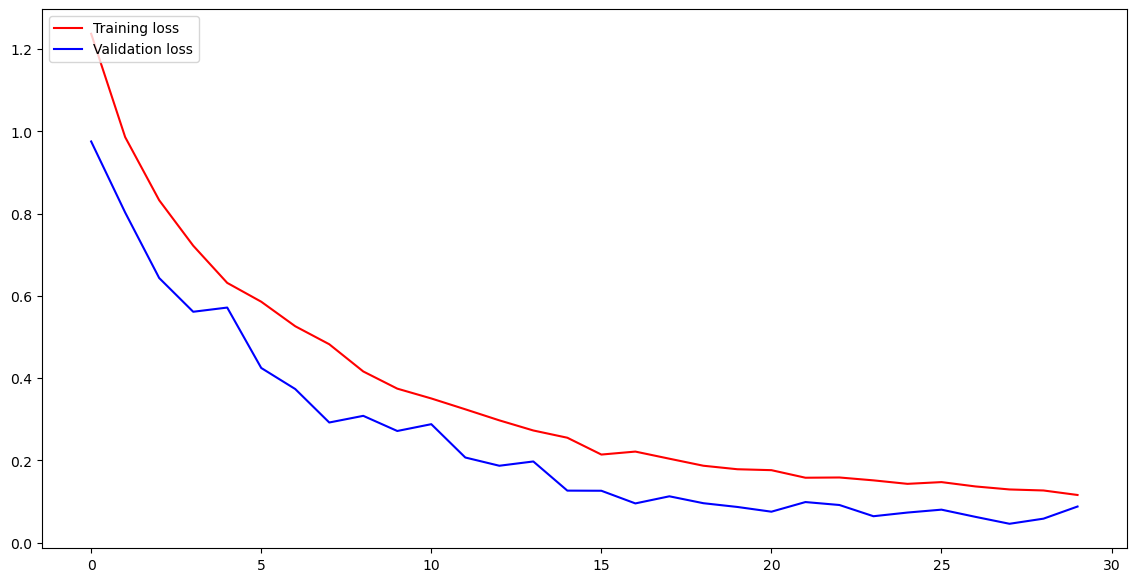

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix

31/31 [==============================] - 2s 59ms/step
Confusion Matrix


Text(98.2222222222222, 0.5, 'Predicted class')

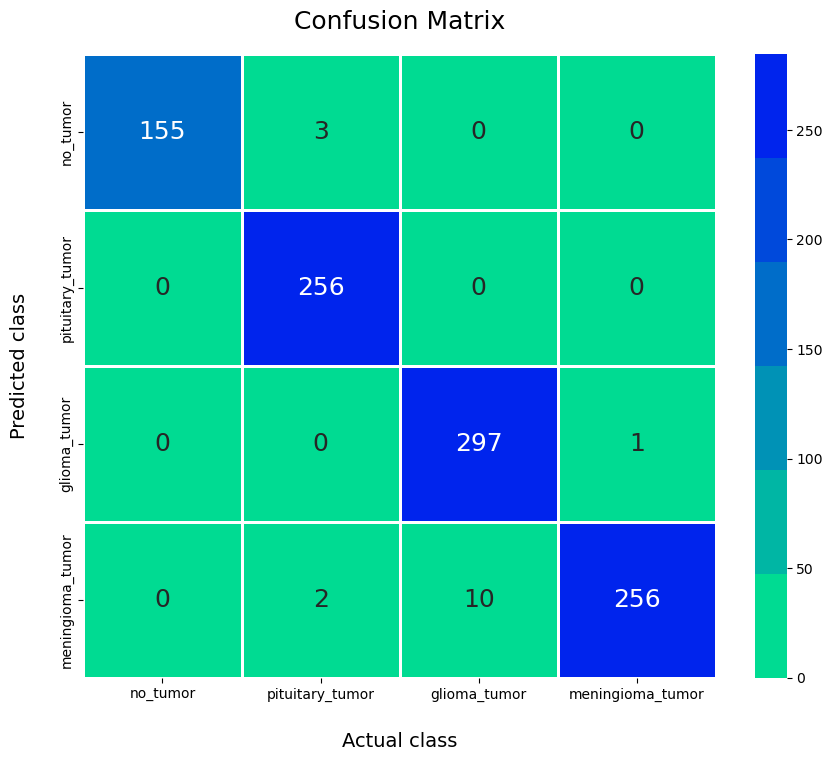

In [21]:
y_test_arg=np.argmax(Y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
fig,ax= plt.subplots(figsize=(10.2,8.1))
a=sns.color_palette("winter_r")  #_r inverts the palette
sns.heatmap(cm, annot=True,fmt='g',linewidths=1,linecolor='white',robust=True,annot_kws={"size":18},cmap=a)
#annot_kws: settings about annotations
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.yticks(va="center")
plt.title('Confusion Matrix',fontsize=18,pad=18)
plt.xlabel('Actual class',labelpad=22,fontsize=14)
plt.ylabel('Predicted class',labelpad=22,fontsize=14)

In [22]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

31/31 [==============================] - 2s 59ms/step


In [23]:
Y_test2 = np.argmax(Y_test,axis=1)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test2,classes_x,target_names=labels))

                  precision    recall  f1-score   support

        no_tumor       1.00      0.98      0.99       158
 pituitary_tumor       0.98      1.00      0.99       256
    glioma_tumor       0.97      1.00      0.98       298
meningioma_tumor       1.00      0.96      0.98       268

        accuracy                           0.98       980
       macro avg       0.99      0.98      0.98       980
    weighted avg       0.98      0.98      0.98       980

